# Lec 11.2 Machine learning 2

# Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\Bridgett\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Bridgett\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Bridgett\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Bridgett\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

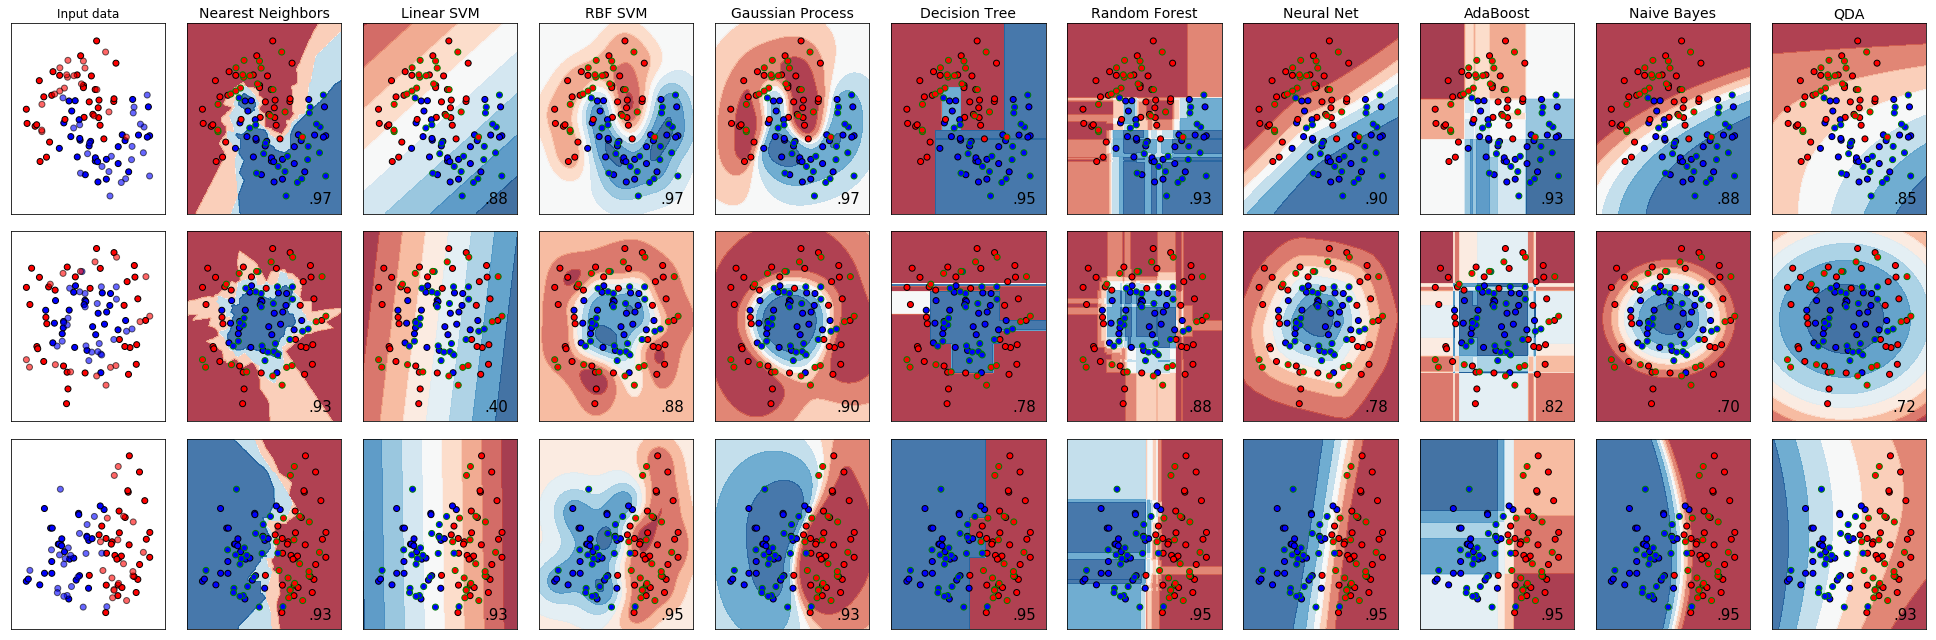

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Load all of the packages in

Note they do this for each package separately

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data and pre-proccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# all the classifiers we will use:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [3]:
h = .02  # step size in the mesh

# create a string list of all the cassifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [4]:
# create a function list of all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

## Part 1: Make some datasets to classify

The example uses three types of data, linearly separable, moons and circles

### D1. Linearly separable (side by side data)

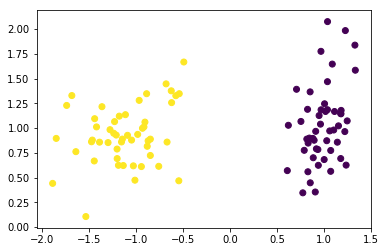

In [5]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [6]:
# add som noise to these so they smoosh together
X_old = np.copy(X)
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

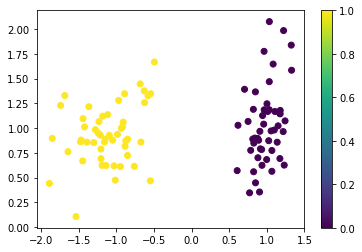

In [7]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

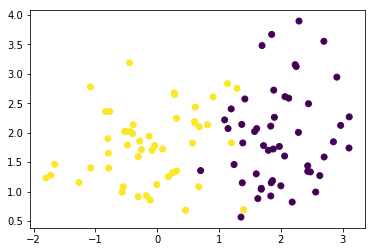

In [8]:
plt.scatter(X[:,0],X[:,1], c = y)

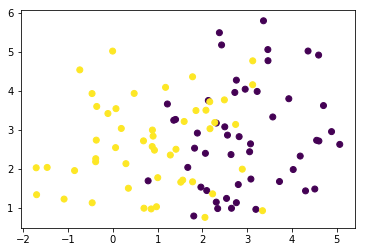

In [9]:
X_old = X
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
plt.scatter(X_old[:,0],X_old[:,1], c = y)

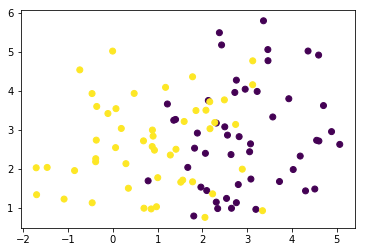

In [10]:
X_old = np.copy(X)
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
plt.scatter(X_old[:,0],X_old[:,1], c = y)

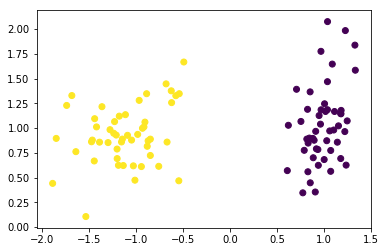

In [11]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

### E1. What happens if you use X_old = X instead of X_old = np.copy(X)?

Using X_old = X creates a grid where the points are overlapping. This noise happens because X and X_old are linked. When we change X by adding it to the random number, X += 2 * rng.uniform(size=X.shape), it also changes X_old with it.

Making a copy prevents X_old from being affected when we preform operations on X.


### D2. Moons

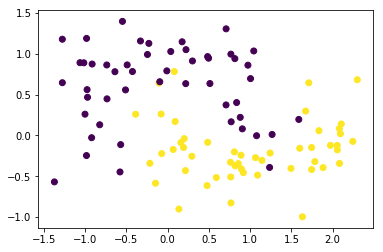

In [12]:
X,y = make_moons(noise=0.3, random_state=12)
plt.scatter(X[:,0],X[:,1], c = y)

### E2. What happens to the make_moons data if you change the noise and random state? Why do you think they picked noise = 0.3?

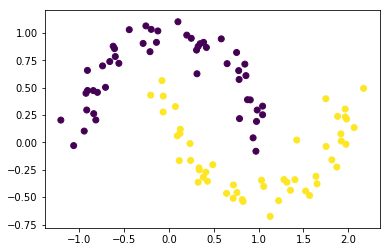

In [13]:
X,y = make_moons(noise=0.1, random_state=4)
plt.scatter(X[:,0],X[:,1], c = y)

when you change the noise and the random_state, the moons appear clearer. 0.3 was just enough noise to where the two colored circles are not completely overlapping, but also not in a perfect moon shape.

### D3 Circles

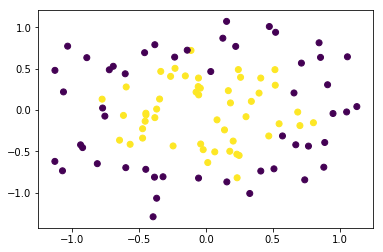

In [34]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

### E2. Play around with the options for make_circles. What does factor do?

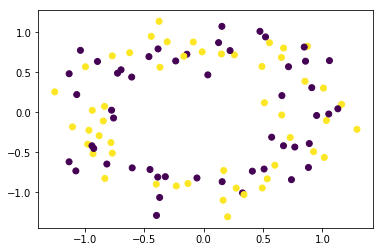

In [35]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=.99, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

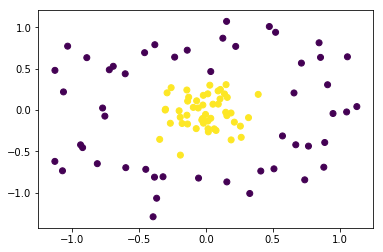

In [36]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=.01, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

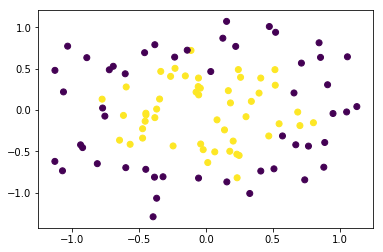

In [37]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

Decreasing the factor makes the circles completely separate, while increasing it makes them overlap. 

In [38]:
# put the three types of datasets together in one array
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

## Part 2: Big double for loop

The next part of the code has a double for loop that:

    Loops over the datasets
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
    
        Loops over the classifiers
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
        
        
Let's break this down, and start with one dataset and apply a number of classifiers to it

### Using first dataset (moons) and first estimator

#### FIrst we preproccess
preprocess dataset, split into training and test part

scale the data

In [39]:
# get the first dataset, which is moons
X, y = datasets[0]
X_copy=np.copy(X)
# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(X)


## E3 make a plot with two subplots, showing the scaled and unscaled data next to each other. How are they different?

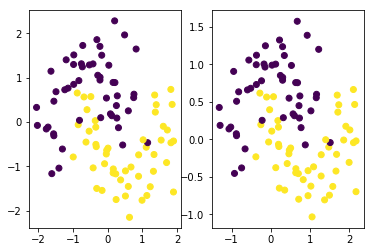

In [40]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(X[:,0],X[:,1], c=y)
ax[1].scatter(X_copy[:,0],X_copy[:,1], c=y)

Plotting them together, I can see that the data distribution did not change. The scale of the plot changed. Instead of going from -2 to 2 like the scaled version did, the scaled varible X_copy is plotted from -1 to 1.5.

In [41]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)


###### E4 What percentage of the data is used for training here?

60% of the data was used for the training set. I know this because the test_size is .4

### plot the data

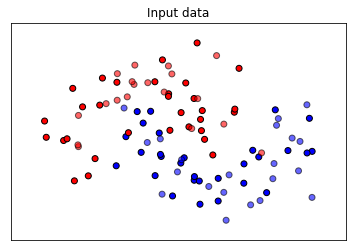

In [42]:
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


Note the testing data is the more transparent set, and the training data is darker

Now we are ready to apply classifiers

Remember we are doing the following:

classifiers = [

    KNeighborsClassifier(3),
    
    SVC(kernel="linear", C=0.025),
    
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    DecisionTreeClassifier(max_depth=5),
    
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    
    MLPClassifier(alpha=1),
    
    AdaBoostClassifier(),
    
    GaussianNB(),
    
    QuadraticDiscriminantAnalysis()]

## Nearest neighbors
Basically this method looks at k number of nearest neighbors, using some distance metric, and predicts which class a point is in based on the type of thing those neighbors are.

intro https://www.python-course.eu/k_nearest_neighbor_classifier.php

see https://scikit-learn.org/stable/modules/neighbors.html

and https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

actual help files:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [43]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)



In [44]:
name

'Nearest Neighbors'

In [45]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
score

0.975

Next we will plot the decision boundary using the mesh we generated. Basically this is asking, for each point on the plane, which group would I be in, red or blue?

In [47]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

## E5 what does the xx.ravel() bit of code do?

In [51]:
import numpy as np
y_1 = np.array(((1,2,3),(4,5,6),(7,8,9)))
#OUTPUT:
print(y_1.ravel())


[1 2 3 4 5 6 7 8 9]


I understood this with a simple example. Ravel converts your array into one dimension.

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

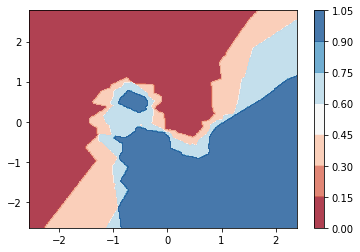

In [52]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

## E6 what do the light blue and peach colors represent?


the light blue and peach colors represnt the intermediate zones where the confidence of the predictions is between .30 and .75. This means that the data points that fall in these areas might not represent the model as well as if it had fell in the darker regions.

Now we will add in the training and testing points, and see how well the method did to predict the latter

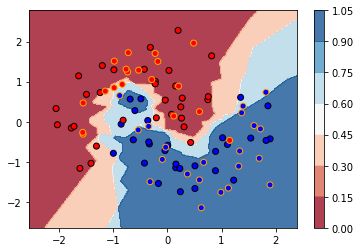

In [53]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## E7 How well did the method do? Are their outliers in either class? Is it reasonable that this method did not predict those, given the training dataset?

I think that the model did well at representing the data. Most of the blue and red circles with orange outlines are in the dark regions. There are a few outliers. This method does not do well at handling these outliers. If we were to split the data up again into a training set and a test set, the result might look very different.

## E8 Using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [58]:
names

['Nearest Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Gaussian Process',
 'Decision Tree',
 'Random Forest',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes',
 'QDA']

In [81]:
# I want to do Decision Tree
#Decision tree is names[4]
#Decision tree is #classifiers[4]

c = 4

name = names[4]
clf = classifiers[c]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)



In [61]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

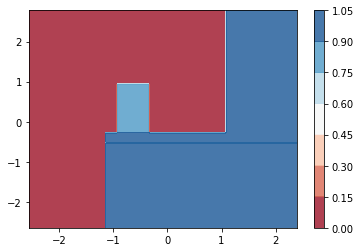

In [62]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

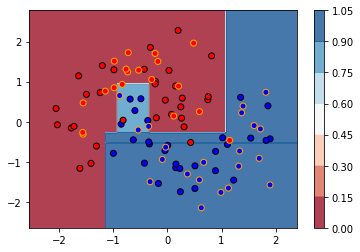

In [63]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## E9 Again, using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [64]:
names

['Nearest Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Gaussian Process',
 'Decision Tree',
 'Random Forest',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes',
 'QDA']

In [80]:
# I want to do 'Random Forest'
#'Random Forest' is names[5]
#'Random Forest' is #classifiers[5]

c = 5

name = names[5]
clf = classifiers[c]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)



In [66]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

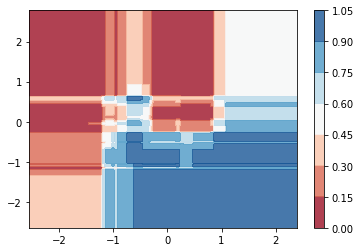

In [67]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

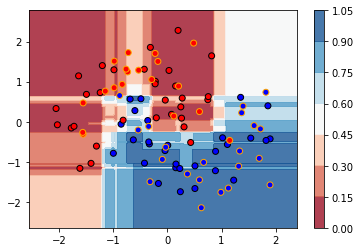

In [68]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## E10-11 pick a few more to go through

10.

In [69]:
names

['Nearest Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Gaussian Process',
 'Decision Tree',
 'Random Forest',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes',
 'QDA']

In [79]:
#'Linear SVM',
#Linear SVM is names[1]
#Linear SVM is #classifiers[1]

c = 1

name = names[1]
clf = classifiers[c]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [71]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    

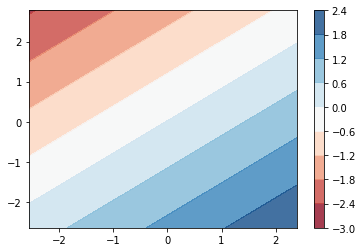

In [72]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

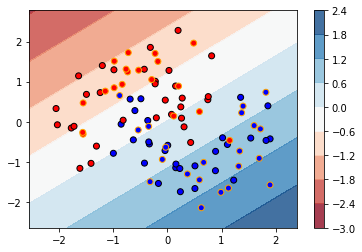

In [73]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

11.

In [85]:
c = 7

name = names[7]
clf = classifiers[c]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [86]:
name

'AdaBoost'

In [87]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    

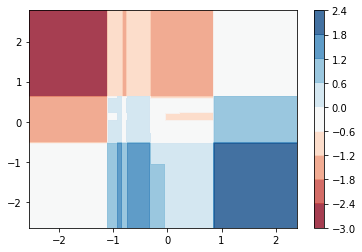

In [88]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

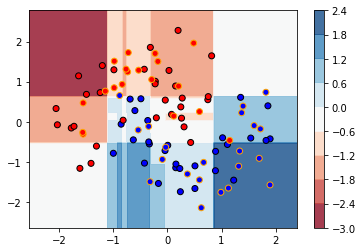

In [89]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## Notes on clustering vs. classification

Note that clustering is similar, but we don't have the y data, i.e. red/blue or any type of class assignemnt in the data itself, just locations in some variable space (could be lat/lon, or could be something way more abstract, like frequency vs. intensity space for sound data).

Here is a clustering example, similar to what we did above, that may be interesting:
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py